Stats after 16 matches:

+Attacking: Shots attempted/on target, SoT%, Goals, xG/npxG, Chances conversion %, Shot distance

+Defending (PAdj stats): Tackles attempted/won, Interceptions, Clearances, Possession won (in opp. half), Pressures, PPDA, Fouls committed

+Possession: Passes attempted/completed, Passes into opp. half/final third/penalty box, Chances created/Key passes, Crosses attempted/completed, Dribbles attempted/completed, Fouls won

+Transition: Ball recovery time (att -> def), Attacking speed (def -> att)

Then visualise these stats into a table

In [143]:
# Import necessary libraries
from statsbombpy import sb
from math import sqrt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib

# Plottable lib by znstrider -> create stat tables (inspired by Opta Analyst's Data Hub)
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

## Accessing and filtering Statsbomb's Indian Super League 2021/22 data

In [2]:
# Retrieve all competition data from Statsbomb
# Average running time: 15-16 minutes
isl_events = sb.competition_events(
    country = 'India',
    division = 'Indian Super league',
    season = '2021/2022',
    gender = 'male'
)

c:\Users\daoho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [3]:
# Access Indian Super League's matches data from Statsbomb
isl_matches = sb.matches(competition_id = 1238, season_id = 108)

c:\Users\daoho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [4]:
# Split the isl_matches df into smaller dfs with each team's matches and sort the df by match week
# Then get all match IDs and store in a different df
mohun_bagan_matches = isl_matches.loc[( (isl_matches['home_team'] == "ATK Mohun Bagan") | (isl_matches['away_team'] == "ATK Mohun Bagan") ) & (isl_matches['match_week'] <= 18)].reset_index()
mohun_bagan_matches.sort_values('match_week', axis = 0)
mohun_bagan_matches.reset_index()
mohun_bagan_matchIds = mohun_bagan_matches['match_id'].to_list()

mumbai_city_matches = isl_matches.loc[( (isl_matches['home_team'] == "Mumbai City") | (isl_matches['away_team'] == "Mumbai City") ) & (isl_matches['match_week'] <= 17)].reset_index()
mumbai_city_matches.sort_values('match_week', axis = 0)
mumbai_city_matches.reset_index()
mumbai_city_matchIds = mumbai_city_matches['match_id'].to_list()

northeast_united_matches = isl_matches.loc[( (isl_matches['home_team'] == "NorthEast United") | (isl_matches['away_team'] == "NorthEast United") ) & (isl_matches['match_week'] <= 17)].reset_index()
northeast_united_matches.sort_values('match_week', axis = 0)
northeast_united_matches.reset_index()
northeast_united_matchIds = northeast_united_matches['match_id'].to_list()

bengaluru_matches = isl_matches.loc[( (isl_matches['home_team'] == "Bengaluru") | (isl_matches['away_team'] == "Bengaluru") ) & (isl_matches['match_week'] <= 17)].reset_index()
bengaluru_matches.sort_values('match_week', axis = 0)
bengaluru_matches.reset_index()
bengaluru_matchIds = bengaluru_matches['match_id'].to_list()

goa_matches = isl_matches.loc[( (isl_matches['home_team'] == "Goa") | (isl_matches['away_team'] == "Goa") ) & (isl_matches['match_week'] <= 18)].reset_index()
goa_matches.sort_values('match_week', axis = 0)
goa_matches.reset_index()
goa_matchIds = goa_matches['match_id'].to_list()

hyderabad_matches = isl_matches.loc[( (isl_matches['home_team'] == "Hyderabad") | (isl_matches['away_team'] == "Hyderabad") ) & (isl_matches['match_week'] <= 17)].reset_index()
hyderabad_matches.sort_values('match_week', axis = 0)
hyderabad_matches.reset_index()
hyderabad_matchIds = hyderabad_matches['match_id'].to_list()

jamshedpur_matches = isl_matches.loc[( (isl_matches['home_team'] == "Jamshedpur") | (isl_matches['away_team'] == "Jamshedpur") ) & (isl_matches['match_week'] <= 18)].reset_index()
jamshedpur_matches.sort_values('match_week', axis = 0)
jamshedpur_matches.reset_index()
jamshedpur_matchIds = jamshedpur_matches['match_id'].to_list()

chennaiyin_matches = isl_matches.loc[( (isl_matches["home_team"] == "Chennaiyin") | (isl_matches["away_team"] == "Chennaiyin") ) & ( (isl_matches["home_managers"] == "Božidar Bandović") | (isl_matches["away_managers"] == "Božidar Bandović") )].reset_index()
chennaiyin_matches.sort_values('match_week', axis = 0)
chennaiyin_matches.reset_index()
chennaiyin_matchIds = chennaiyin_matches['match_id'].to_list()

east_bengal_matches = isl_matches.loc[( (isl_matches['home_team'] == "East Bengal") | (isl_matches['away_team'] == "East Bengal") ) & (isl_matches['match_week'] <= 17)].reset_index()
east_bengal_matches.sort_values('match_week', axis = 0)
east_bengal_matches.reset_index()
east_bengal_matchIds = east_bengal_matches['match_id'].to_list()

kerala_blasters_matches = isl_matches.loc[( (isl_matches['home_team'] == "Kerala Blasters") | (isl_matches['away_team'] == "Kerala Blasters") ) & (isl_matches['match_week'] <= 18)].reset_index()
kerala_blasters_matches.sort_values('match_week', axis = 0)
kerala_blasters_matches.reset_index()
kerala_blasters_matchIds = kerala_blasters_matches['match_id'].to_list()

odisha_matches = isl_matches.loc[( (isl_matches['home_team'] == "Odisha") | (isl_matches['away_team'] == "Odisha") ) & (isl_matches['match_week'] <= 18)].reset_index()
odisha_matches.sort_values('match_week', axis = 0)
odisha_matches.reset_index()
odisha_matchIds = odisha_matches['match_id'].to_list()

# Manually check if the array contains 16 matches or not
# len(odisha_matches)

In [5]:
# Split the isl_events df into smaller dfs with each team's events
mohun_bagan = isl_events.loc[(isl_events['team'] == "ATK Mohun Bagan") & (isl_events['match_id'].isin(mohun_bagan_matchIds))]
mohun_bagan = mohun_bagan.reset_index()

mumbai_city = isl_events.loc[(isl_events['team'] == "Mumbai City") & (isl_events['match_id'].isin(mumbai_city_matchIds))]
mumbai_city = mumbai_city.reset_index()

northeast_united = isl_events.loc[(isl_events['team'] == "NorthEast United") & (isl_events['match_id'].isin(northeast_united_matchIds))]
northeast_united = northeast_united.reset_index()

bengaluru = isl_events.loc[(isl_events['team'] == "Bengaluru") & (isl_events['match_id'].isin(bengaluru_matchIds))]
bengaluru = bengaluru.reset_index()

goa = isl_events.loc[(isl_events['team'] == "Goa") & (isl_events['match_id'].isin(goa_matchIds))]
goa = goa.reset_index()

hyderabad = isl_events.loc[(isl_events['team'] == "Hyderabad") & (isl_events['match_id'].isin(hyderabad_matchIds))]
hyderabad = hyderabad.reset_index()

jamshedpur = isl_events.loc[(isl_events['team'] == "Jamshedpur") & (isl_events['match_id'].isin(jamshedpur_matchIds))]
jamshedpur = jamshedpur.reset_index()

chennaiyin = isl_events.loc[(isl_events['team'] == "Chennaiyin") & (isl_events['match_id'].isin(chennaiyin_matchIds))]
chennaiyin = chennaiyin.reset_index()

east_bengal = isl_events.loc[(isl_events['team'] == "East Bengal") & (isl_events['match_id'].isin(east_bengal_matchIds))]
east_bengal = east_bengal.reset_index()

kerala_blasters = isl_events.loc[(isl_events['team'] == "Kerala Blasters") & (isl_events['match_id'].isin(kerala_blasters_matchIds))]
kerala_blasters = kerala_blasters.reset_index()

odisha = isl_events.loc[(isl_events['team'] == "Odisha") & (isl_events['match_id'].isin(odisha_matchIds))]
odisha = odisha.reset_index()

## Stats calculating section
### General functions

In [6]:
# Function to create a stats dict
# Pre: n/a
# Post: dict team_stats contains all required stats

def dict_creator():
    
    team_stats = {
        "Shots attempted": 0,
        "Shots on Target": 0,
        "Shots on Target, %": 0,
        "Goals": 0,
        "Non-penalty xG": 0,
        "Chances conversion, %": 0,
        "Shot distance": 0,
        "PAdj Tackles attempted": 0,
        "PAdj Tackles won": 0,
        "PAdj Tackles won, %": 0,
        "PAdj Interceptions won": 0,
        "PAdj Clearances": 0,        
        "PAdj Possession won": 0,
        "PAdj Possession won in opp. half": 0,
        "PAdj Pressures": 0,
        "Opposition's passes per defensive action": 0,
        "Fouls committed": 0,
        "Passes attempted": 0,
        "Passes completed": 0,
        "Passes completion, %": 0,
        "Passes into opposition's half": 0,
        "Passes into final third": 0,
        "Passes into penalty box": 0,
        "Key passes": 0,
        "Crosses attempted": 0,
        "Crosses completed": 0,
        "Crosses completion, %": 0,
        "Dribbles attempted": 0,
        "Dribbles completed": 0,
        "Carries": 0,
        "Carries into final third": 0,
        "Fouls won": 0
        # "Ball recovery time": 0,
        # "Attacking speed": 0
    }

    return team_stats

In [7]:
# Find the average per match stats
def per_match(statName, noOfMatch, roundToDigits):
    return round(statName / noOfMatch, roundToDigits)

In [8]:
# Calculate the percentage stats from decimals to percentage form
def decimalsToPercentage(statName, roundToDigits):
    return round(statName * 100, roundToDigits)

In [9]:
# Add the calculated stat to the total amount
def total_addition(total_stats, calculated_stats, roundToDigits):
    return round(total_stats + calculated_stats, roundToDigits)

In [10]:
# Function to count the number of events took place inside the opposition's half (for possWonoppHalf)
def oppHalf_counter(events_df):

    # Empty variable to store total number of events
    total_oppHalfEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is >= 60
        if (events_df['location'][i][0] >= 60):
            total_oppHalfEvents += 1

    # Return the variable to the caller
    return total_oppHalfEvents

In [11]:
# Function to count the number of events took place inside 55% opposition's half (for PPDA)
def ppda_counter(events_df):

    # Empty variable to store total number of events
    total_oppHalfEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is >= 50
        if (events_df['location'][i][0] >= 50):
            total_oppHalfEvents += 1

    # Return the variable to the caller
    return total_oppHalfEvents

In [12]:
# Function to count the number of passes ended inside the opposition's half
def passesOppHalf_counter(events_df):

    # Empty variable to store total number of events
    total_oppHalfEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is >= 60
        if (events_df['pass_end_location'][i][0] >= 60):
            total_oppHalfEvents += 1

    # Return the variable to the caller
    return total_oppHalfEvents

In [13]:
# Function to count the number of passes ended inside the final third
def passesFinalThird_counter(events_df):

    # Empty variable to store total number of events
    total_finalThirdEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is >= 80
        if (events_df['pass_end_location'][i][0] >= 80):
            total_finalThirdEvents += 1

    # Return the variable to the caller
    return total_finalThirdEvents

In [14]:
# Function to count the number of carries ended inside the final third
def carriesFinalThird_counter(events_df):

    # Empty variable to store total number of events
    total_finalThirdEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is >= 80
        if (events_df['carry_end_location'][i][0] >= 80):
            total_finalThirdEvents += 1

    # Return the variable to the caller
    return total_finalThirdEvents

In [15]:
# Function to count the number of passes ended inside the penalty box
def passesPenaltyBox_counter(events_df):

    # Empty variable to store total number of events
    total_penaltyBoxEvents = 0

    # For loop to go through every events in the df
    for i in range(len(events_df) - 1):
        
        # Increment the variable if x coordinate of an event is in between 102 and 120
        # and y coordinate of an event is between 18 and 62
        if (102 <= events_df['pass_end_location'][i][0] <= 120) and (18 <= events_df['pass_end_location'][i][1] <= 62):
            total_penaltyBoxEvents += 1

    # Return the variable to the caller
    return total_penaltyBoxEvents

### Attacking stats-related functions

In [16]:
# Function to filter out shot events from team DataFrame
def shot_filter(team_df):
    return team_df.loc[(team_df['type'] == 'Shot') & (team_df.shot_type != 'Penalty')].drop('level_0', axis = 1).reset_index().fillna(0)

In [17]:
# Calculate the total number of shots attempted
def shots_attempted(all_shots):
    return len(all_shots)

In [18]:
# Calculate the total number of shots on target
def shots_on_target(all_shots):
    return len(all_shots.loc[(all_shots.shot_outcome == 'Goal') | (all_shots.shot_outcome == 'Saved')])

In [19]:
# Calculate the total percentage of shots on target
def sot_percentage(shotsOnTarget, shotsAttempted, roundToDigits):
    return round(shotsOnTarget / shotsAttempted, roundToDigits)

In [20]:
# Calculate the total number of goals scored
def goals(all_shots):
    return len(all_shots.loc[(all_shots.shot_outcome == 'Goal')])

In [21]:
# Calculate the total non-penalty xG
def npxg(all_shots):
    return all_shots.loc[(all_shots.shot_type != 'Penalty')].shot_statsbomb_xg.sum()

In [22]:
# Calculate the total chances conversion percentage
def chances_conversion(goalsScored, shotsAttempted, roundToDigits):
    return round(goalsScored / shotsAttempted, roundToDigits)

In [23]:
# Calculate the total shot distance
def shot_distance(all_shots, roundToDigits):
    
    # Calculate the average shot distance
    total_shot_distance = 0
    x_start = 0
    y_start = 0
    x_end = 0
    y_end = 0

    # Get the total distance of every shots taken
    for i in range(len(all_shots) - 1):

        x_start = all_shots.location[i][0]
        y_start = all_shots.location[i][1]
        x_end = all_shots.shot_end_location[i][0]
        y_end = all_shots.shot_end_location[i][1]

        total_shot_distance = total_shot_distance + sqrt( ( (x_end - x_start) * (x_end - x_start) ) + ( (y_end - y_start) * (y_end - y_start) ) )

    # Divide the total distance by the number of shots to get the average shot_distance
    shotDistance = round(total_shot_distance / len(all_shots), roundToDigits)

    return shotDistance

Calculate distance using coordinates: sqrt( ( (x_end - x_start) ^ 2) + ( (y_end - y_start) ^ 2)  )

In [24]:
# Function to gather attacking stats
# Pre: Dict contains the stats & DataFrame contains the events
# Post: team_dict with all attacking stats filled in

def attacking_stats(team_dict, team_df):

    # Blank variables to store the total stat
    shotsAttempted = 0
    shotsOnTarget = 0
    sotPercentage = 0
    goalsScored = 0
    npxG = 0
    chancesConversion = 0
    shotDistance = 0

    # Store all events type 'Shot' in a different df
    all_shots = shot_filter(team_df)

    # Store the total stats into the empty variables
    shotsAttempted = shots_attempted(all_shots)
    shotsOnTarget = shots_on_target(all_shots)
    sotPercentage = sot_percentage(shotsOnTarget, shotsAttempted, 2)
    goalsScored = goals(all_shots)
    npxG = npxg(all_shots)
    chancesConversion = chances_conversion(goalsScored, shotsAttempted, 2)
    shotDistance = shot_distance(all_shots, 2)

    # Assign calculated values into team_dict
    team_dict["Shots attempted"] = per_match(shotsAttempted, 16, 2)
    team_dict["Shots on Target"] = per_match(shotsOnTarget, 16, 2)
    team_dict["Shots on Target, %"] = decimalsToPercentage(sotPercentage, 0)
    team_dict["Goals"] = per_match(goalsScored, 16, 2)
    team_dict["Non-penalty xG"] = per_match(npxG, 16, 2)
    team_dict["Chances conversion, %"] = decimalsToPercentage(chancesConversion, 0)
    team_dict["Shot distance"] = shotDistance

    return team_dict

### Defending stats-related functions

In [25]:
# Calculate the ball in play time for each team
# PAdj formula: (tackles or interceptions) / (opposition_ballInPlay) * (total_ballInPlay / 2)
# opposition_ballInPlay and total_ballInPlay are in minutes
def ball_in_play(isl_events, team_matchId, team_name):

    # Empty variables to store ball-in-play times
    total_ballInPlay = 0
    opposition_ballInPlay = 0

    # Gather all events and opposition's events in one match
    all_events = isl_events.loc[(isl_events['match_id'] == team_matchId)]
    opposition_events = isl_events.loc[(isl_events['team'] != team_name) & (isl_events['match_id'] == team_matchId)]

    # Calculate the total and opposition's ball-in-play time (in minutes)
    total_ballInPlay = round(all_events.duration.sum() / 60, 2)
    opposition_ballInPlay = round(opposition_events.duration.sum() / 60, 2)

    # Return an array that contains the match's and the opposition's ball-in-play time
    return [total_ballInPlay, opposition_ballInPlay]

In [26]:
# Applying ball-in-play stats to the overall stats
def ballInPlay_applier(ball_in_play, stats_name, roundToDigits):
    return round(stats_name / ball_in_play[1] * (ball_in_play[0] / 2), roundToDigits)

In [27]:
# Open and filter tackling events
def tackles_events(isl_events, matchId, team_name):
    all_tackles = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['duel_type'] == 'Tackle')].reset_index()
    return all_tackles

In [28]:
# Open and filter tackles won events
def tacklesWon_events(isl_events, matchId, team_name):
    all_tackles = tackles_events(isl_events, matchId, team_name)
    tackles_won = all_tackles.loc[(all_tackles['duel_outcome'] == 'Won') | (all_tackles['duel_outcome'] == 'Success') | (all_tackles['duel_outcome'] == 'Success In Play') | (all_tackles['duel_outcome'] == 'Success Out')].drop('level_0', axis = 1).reset_index()
    return tackles_won

In [29]:
# Calculate the total number of PAdj tackles attempted and won
def tackles(isl_events, team_matchIds, team_name, roundToDigits):

    total_tacklesAttempted = 0
    total_tacklesWon = 0

    for matchId in team_matchIds:

        # Empty variables to store values
        ballInPlay = []
        tacklesAttempted = 0
        tacklesWon = 0
        
        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all tackles event and then filter out to get all successful tackles
        all_tackles = tackles_events(isl_events, matchId, team_name)
        tackles_won = tacklesWon_events(isl_events, matchId, team_name)

        # Count the number of events in each df and store it in the respective variable
        tacklesAttempted = len(all_tackles)
        tacklesWon = len(tackles_won)

        # Apply the ball-in-play time to get PAdj stats
        tacklesAttempted = ballInPlay_applier(ballInPlay, tacklesAttempted, roundToDigits)
        tacklesWon = ballInPlay_applier(ballInPlay, tacklesWon, roundToDigits)

        # Add the stats of each match to the total count
        total_tacklesAttempted = total_addition(total_tacklesAttempted, tacklesAttempted, roundToDigits)
        total_tacklesWon = total_addition(total_tacklesWon, tacklesWon, roundToDigits)
    
    return [total_tacklesAttempted, total_tacklesWon]

In [30]:
# Calculate the total successful tackles percentage
def tackle_percentage(tacklesAttempted, tacklesWon, roundToDigits):
    return round(tacklesWon / tacklesAttempted, roundToDigits)

In [31]:
# Open and filter all interception events
def interception_events(isl_events, matchId, team_name):
    all_interceptions = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Interception')].reset_index()
    return all_interceptions

In [32]:
# Open and filter all successful interception events
def interceptionWon_events(isl_events, matchId, team_name):
    all_interceptions = interception_events(isl_events, matchId, team_name)
    successful_interceptions = all_interceptions.loc[(all_interceptions['interception_outcome'] == 'Won') | (all_interceptions['interception_outcome'] == 'Success') | (all_interceptions['interception_outcome'] == 'Success In Play') | (all_interceptions['interception_outcome'] == 'Success Out')].drop('level_0', axis = 1).reset_index()
    return successful_interceptions

In [33]:
# Calculate the total number of PAdj interceptions
def interceptions(isl_events, team_matchIds, team_name, roundToDigits):
    
    total_interceptionsMade = 0
    total_interceptionsWon = 0

    for matchId in team_matchIds:
        
        # Empty variables to store values
        ballInPlay = []
        interceptions_made = 0
        interceptions_won = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all interceptions event
        all_interceptions = interception_events(isl_events, matchId, team_name)
        successful_interceptions = interceptionWon_events(isl_events, matchId, team_name)

        # Count the number of events in the df and store it in the empty variable
        interceptions_made = len(all_interceptions)
        interceptions_won = len(successful_interceptions)

        # Apply the ball-in-play time to get PAdj stats
        interceptions_made = ballInPlay_applier(ballInPlay, interceptions_made, roundToDigits)
        interceptions_won = ballInPlay_applier(ballInPlay, interceptions_won, roundToDigits)

        # Add the stats of each match to the total count
        total_interceptionsMade = total_addition(total_interceptionsMade, interceptions_made, roundToDigits)
        total_interceptionsWon = total_addition(total_interceptionsWon, interceptions_won, roundToDigits)
    
    return total_interceptionsWon

In [34]:
# Calculate the total number of PAdj clearances
def clearances(isl_events, team_matchIds, team_name, roundToDigits):
    
    total_clearances = 0

    for matchId in team_matchIds:
        
        # Empty variables to store values
        ballInPlay = []
        clearances_made = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all clearances event
        all_clearances = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Clearance')].reset_index()

        # Count the number of events in the df and store it in the empty variable
        clearances_made = len(all_clearances)

        # Apply the ball-in-play time to get PAdj stats
        clearances_made = ballInPlay_applier(ballInPlay, clearances_made, roundToDigits)

        # Add the stats of each match to the total count
        total_clearances = total_addition(total_clearances, clearances_made, roundToDigits)
    
    return total_clearances

In [35]:
# Open and filter all ball recovery events
def ballRecovery_events(isl_events, matchId, team_name):
    all_ball_recoveries = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Ball Recovery')].reset_index()
    return all_ball_recoveries

In [36]:
# Open and filter all successful ball recovery events
def ballRecoveryWon_events(isl_events, matchId, team_name):
    all_ball_recoveries = ballRecovery_events(isl_events, matchId, team_name)
    successful_ball_recoveries = all_ball_recoveries.loc[(all_ball_recoveries['ball_recovery_recovery_failure'] != True)].drop('level_0', axis = 1).reset_index()
    return successful_ball_recoveries

In [37]:
# Calculate the total number of PAdj successful ball recoveries (for func possessionWon)
def ball_recoveries(isl_events, team_matchIds, team_name, roundToDigits):

    total_ballRecoveries = 0

    for matchId in team_matchIds:

        # Empty variables to store values
        ballInPlay = []
        ball_recoveries = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all ball_recoveries event
        successful_ball_recoveries = ballRecoveryWon_events(isl_events, matchId, team_name)

        # Count the number of events in the df and store it in the empty variable
        ball_recoveries = len(successful_ball_recoveries)

        # Apply the ball-in-play time to get PAdj stats
        ball_recoveries = ballInPlay_applier(ballInPlay, ball_recoveries, roundToDigits)

        # Add the stats of each match to the total count
        total_ballRecoveries = total_addition(total_ballRecoveries, ball_recoveries, roundToDigits)
    
    return total_ballRecoveries

In [38]:
# Open and filter all 50/50 events
def fiftyfifty_events(isl_events, matchId, team_name):
    all_50_50 = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == '50/50')].reset_index()
    return all_50_50

In [39]:
# Count the total number of successful 50/50 events
def fiftyfiftyWon_events(all_50_50):
    
    # Empty variable to store total number of events
    successful_50_50 = 0

    # If condition to filter out unsuccessful 50-50s
    for i in range(len(all_50_50) - 1):

        if (all_50_50['50_50'][i]['outcome']['id'] == 3) or (all_50_50['50_50'][i]['outcome']['id'] == 4):
            successful_50_50 += 1

    return successful_50_50

In [40]:
# Calculate the total number of PAdj successful 50/50s (for func possessionWon)
def fifty_fifty(isl_events, team_matchIds, team_name, roundToDigits):

    total_50_50 = 0

    for matchId in team_matchIds:

        # Empty variables to store values
        ballInPlay = []
        successful_50_50 = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all necessary events
        all_50_50 = fiftyfifty_events(isl_events, matchId, team_name)

        # Call function to calculate the total number of successful 50/50 events
        successful_50_50 = fiftyfiftyWon_events(all_50_50)

        # Apply the ball-in-play time to get PAdj stats
        successful_50_50 = ballInPlay_applier(ballInPlay, successful_50_50, roundToDigits)

        # Add the stats of each match to the total count
        total_50_50 = total_addition(total_50_50, successful_50_50, roundToDigits)

    return total_50_50

In [41]:
# Calculate the total number of PAdj possession won
def possession_won(isl_events, team_matchIds, team_name, roundToDigits):
    
    # Empty variables to store values
    total_50_50 = 0
    total_ballRecoveries = 0
    total_interceptions = 0
    total_tackles = 0
    tackling_stats = []

    # Call functions to calculate the number of successful events
    total_50_50 = fifty_fifty(isl_events, team_matchIds, team_name, roundToDigits)
    total_ballRecoveries = ball_recoveries(isl_events, team_matchIds, team_name, roundToDigits)
    total_interceptions = interceptions(isl_events, team_matchIds, team_name, roundToDigits)
    tackling_stats = tackles(isl_events, team_matchIds, team_name, roundToDigits)
    total_tackles = tackling_stats[1] # total_tacklesWon is the second variable in tackling_stats array

    return total_50_50 + total_ballRecoveries + total_interceptions + total_tackles

In [42]:
# Calculate the total number of possession won events took place inside the opposition's half
def posswon_opphalf (isl_events, team_matchIds, team_name, roundToDigits):

    total_possWonOppHalf = 0

    for matchId in team_matchIds:

        # Empty variables to store values
        ballInPlay = []
        successful_ballRecoveries = 0
        successfulInterceptions = 0
        successfulTackle = 0
        successful_50_50 = 0
        possWonoppHalf = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all necessary events
        all_ball_recoveries = ballRecovery_events(isl_events, matchId, team_name)
        successful_ball_recoveries = ballRecoveryWon_events(isl_events, matchId, team_name)

        all_interceptions = interception_events(isl_events, matchId, team_name)
        successful_interceptions = interceptionWon_events(isl_events, matchId, team_name)

        all_tackles = tackles_events(isl_events, matchId, team_name)
        tackles_won = tacklesWon_events(isl_events, matchId, team_name)

        # Calculate the total number of events inside the opposition's half
        successful_ballRecoveries = oppHalf_counter(successful_ball_recoveries)
        successfulInterceptions = oppHalf_counter(successful_interceptions)
        successfulTackle = oppHalf_counter(tackles_won)

        # Calculate 50-50 events
        # Gather all necessary events
        all_50_50 = fiftyfifty_events(isl_events, matchId, team_name)

        # If condition to filter out unsuccessful 50-50s
        successful_50_50 = fiftyfiftyWon_events(all_50_50)

        # Add the total of each event to the total possWonoppHalf count
        possWonoppHalf = successful_ballRecoveries + successfulInterceptions + successfulTackle + successful_50_50

        # Apply the ball-in-play time to get PAdj stats
        possWonoppHalf = ballInPlay_applier(ballInPlay, possWonoppHalf, 2)

        # Add the stats of each match to the total count
        total_possWonOppHalf = total_addition(total_possWonOppHalf, possWonoppHalf, roundToDigits)

    return total_possWonOppHalf

In [43]:
# Calculate the total number of PAdj pressures
def pressures(isl_events, team_matchIds, team_name, roundToDigits):
    
    total_pressures = 0

    for matchId in team_matchIds:
        
        # Empty variables to store values
        ballInPlay = []
        pressures_made = 0

        # Calculate the ball-in-play times using the ballInPlay function
        ballInPlay = ball_in_play(isl_events, matchId, team_name)

        # Gather all pressures event
        all_pressures = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Pressure')].reset_index()

        # Count the number of events in the df and store it in the empty variable
        pressures_made = len(all_pressures)

        # Apply the ball-in-play time to get PAdj stats
        pressures_made = ballInPlay_applier(ballInPlay, pressures_made, roundToDigits)

        # Add the stats of each match to the total count
        total_pressures = total_addition(total_pressures, pressures_made, roundToDigits)
    
    return total_pressures

In [44]:
# Calculate the total number of PAdj fouls committed
def fouls_committed(isl_events, team_matchIds, team_name, roundToDigits):
    
    total_fouls_committed = 0

    for matchId in team_matchIds:
        
        # Empty variable to store values
        fouls_committed_made = 0

        # Gather all fouls committed event
        all_fouls_committed = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Foul Committed')].reset_index()

        # Count the number of events in the df and store it in the empty variable
        fouls_committed_made = len(all_fouls_committed)

        # Add the stats of each match to the total count
        total_fouls_committed = total_addition(total_fouls_committed, fouls_committed_made, roundToDigits)
    
    return total_fouls_committed

In [45]:
# Calculate average PPDA for each team
def ppda(isl_events, team_matchIds, team_name, roundToDigits):

    opp_passes = 0
    def_actions = 0
    average_ppda = 0

    for matchId in team_matchIds:

        # Empty variable to store values
        total_oppPasses = 0
        total_defActions = 0

        all_passes = isl_events.loc[(isl_events['team'] != team_name) & (isl_events['match_id'] == matchId) & (isl_events['type'] == 'Pass')].reset_index()
        all_defActions = isl_events.loc[(isl_events['team'] == team_name) & (isl_events['match_id'] == matchId) & \
            ( ((isl_events['type'] == 'Duel') & (isl_events['duel_type'] == 'Tackle')) | (isl_events['type'] == 'Block') | \
                (isl_events['type'] == 'Clearance') | (isl_events['type'] == 'Interception'))].reset_index()

        # Calculate the total number of events inside the opposition's half
        total_oppPasses = ppda_counter(all_passes)
        total_defActions = ppda_counter(all_defActions)

        opp_passes = opp_passes + total_oppPasses
        def_actions = def_actions + total_defActions

    average_ppda = round((opp_passes / def_actions), 2)

    return average_ppda

In [46]:
# Function to gather defending stats
# Pre: team_dict with empty defending stats, isl_events, array with each team's match IDs, and specific team name
# Post: team_dict with all defending stats filled in

def defending_stats(team_dict, isl_events, team_matchIds, team_name):
    
    # Blank variables to store total stats
    tackling_stats = []
    tacklesAttempted = 0
    tacklesWon = 0
    tacklesPercentage = 0
    interceptionsMade = 0
    clearancesMade = 0
    possessionWon = 0
    possessionWonOppHalf = 0
    pressuresMade = 0
    PpDA = 0
    foulsCommitted = 0

    tackling_stats = tackles(isl_events, team_matchIds, team_name, 2)
    tacklesAttempted = tackling_stats[0]
    tacklesWon = tackling_stats[1]
    tacklesPercentage = tackle_percentage(tacklesAttempted, tacklesWon, 2)
    interceptionsMade = interceptions(isl_events, team_matchIds, team_name, 2)
    clearancesMade = clearances(isl_events, team_matchIds, team_name, 2)
    possessionWon = possession_won(isl_events, team_matchIds, team_name, 2)
    possessionWonOppHalf = posswon_opphalf(isl_events, team_matchIds, team_name, 2)
    pressuresMade = pressures(isl_events, team_matchIds, team_name, 2)
    PpDA = ppda(isl_events, team_matchIds, team_name, 2)
    foulsCommitted = fouls_committed(isl_events, team_matchIds, team_name, 2)

    team_dict['PAdj Tackles attempted'] = per_match(tacklesAttempted, 16, 2)
    team_dict['PAdj Tackles won'] = per_match(tacklesWon, 16, 2)
    team_dict['PAdj Tackles won, %'] = decimalsToPercentage(tacklesPercentage, 2)
    team_dict['PAdj Interceptions won'] = per_match(interceptionsMade, 16, 2)
    team_dict['PAdj Clearances'] = per_match(clearancesMade, 16, 2)
    team_dict['PAdj Possession won'] = per_match(possessionWon, 16, 2)
    team_dict['PAdj Possession won in opp. half'] = per_match(possessionWonOppHalf, 16, 2)
    team_dict['PAdj Pressures'] = per_match(pressuresMade, 16, 2)
    team_dict["Opposition's passes per defensive action"] = PpDA
    team_dict['Fouls committed'] = per_match(foulsCommitted, 16, 2)
    
    return team_dict

### Possession stats-related functions

In [47]:
# Open and get all pass events
def pass_filter(team_df):
    return team_df.loc[(team_df['type'] == 'Pass')].drop('level_0', axis = 1).reset_index().fillna(0)

In [48]:
# Calculate the total number of passes attempted
def passes_attempted(all_passes):
    return len(all_passes)

In [49]:
# Calculate the total number of successful passes
def successful_passes(all_passes):
    return len(all_passes.loc[(all_passes['pass_outcome'] == 0)])

In [50]:
# Calculate the successful passes percentage
def pass_percentage(passesAttempted, successfulPasses):
    return successfulPasses / passesAttempted

In [51]:
# Calculate the total number of passes into opposition's half
def pass_oppHalf(all_passes):
    passesOppHalf = passesOppHalf_counter(all_passes)
    return passesOppHalf

In [52]:
# Calculate the total number of passes into final third
def pass_finalThird(all_passes):
    passesFinalThird = passesFinalThird_counter(all_passes)
    return passesFinalThird

In [53]:
# Calculate the total number of passes into penalty box
def pass_penaltyBox(all_passes):
    passesPenaltyBox = passesPenaltyBox_counter(all_passes)
    return passesPenaltyBox

In [54]:
# Calculate the total number of key passes
def key_passes(all_shots):
    
    # Empty variable to store total number of key passes
    total_keyPasses = 0

    # For loop to check if a shot has a key pass ID goes along with it
    for i in range(len(all_shots) - 1):
        if (all_shots['shot_key_pass_id'][i] != 0):
            total_keyPasses += 1
    
    # Return the total number of key passes to the caller
    return total_keyPasses

In [55]:
# Calculate the total number of crosses made
def crosses_attempted(all_passes):
    return len(all_passes.loc[(all_passes['pass_cross'] == True)])

In [56]:
# Calculate the total number of successful crosses
def successful_crosses(all_passes):
    return len(all_passes.loc[(all_passes['pass_cross'] == True) & (all_passes['pass_outcome'] != 0)])

In [57]:
# Calculate the successful crosses percentage
def crosses_percentage(crossesAttempted, successfulCrosses):
    return successfulCrosses / crossesAttempted

In [58]:
# Open and get all dribble events
def dribbles_filter(team_df):
    return team_df.loc[(team_df['type'] == 'Dribble')].drop('level_0', axis = 1).reset_index()

In [59]:
# Calculate the total number of dribbles attempted
def dribbles_attempted(all_dribbles):
    return len(all_dribbles)

In [60]:
# Calculate the total number of successful dribbles
def dribbles_completed(all_dribbles):
    return len(all_dribbles.loc[(all_dribbles['dribble_outcome'] == 'Complete')])

In [61]:
# Open and get all carry events
def carry_filter(team_df):
    return team_df.loc[(team_df['type'] == 'Carry')].drop('level_0', axis = 1).reset_index()

In [62]:
# Calculate the total number of attempted carries
def carries_attempted(all_carries):
    return len(all_carries)

In [63]:
# Calculate the total number of carries into final third
def carries_finalThird(all_carries):
    carriesFinalThird = carriesFinalThird_counter(all_carries)
    return carriesFinalThird

In [64]:
# Open and get all fouled won events
def foulsWon_filter(team_df):
    return team_df.loc[(team_df['type'] == 'Foul Won')].drop('level_0', axis = 1).reset_index()

In [65]:
# Calculate the total number of fouls won
def fouls_won(all_foulsWon):
    return len(all_foulsWon.loc[(all_foulsWon['foul_won_defensive'] != True)])

In [66]:
# Function to gather the possession stats
# Pre: team_dict with empty possession stats, team_df contains all team's event data
# Post: team_dict with all possession stats filled

def possession_stats(team_dict, team_df):

    # Empty variables to store values
    passesAttempted = 0
    passesCompleted = 0
    passesPercentage = 0
    passesOppHalf = 0
    passesFinalThird = 0
    passesPenaltyBox = 0
    keyPasses = 0
    crossesAttempted = 0
    crossesSuccessful = 0
    crossesPercentage = 0
    dribblesAttempted = 0
    dribblesCompleted = 0
    carriesAttempted = 0
    carriesFinalThird = 0
    foulsWon = 0

    # Store all shots, passes, dribbles, carries, and foul won events in respective arrays
    all_shots = shot_filter(team_df)
    all_passes = pass_filter(team_df)
    all_dribbles = dribbles_filter(team_df)
    all_carries = carry_filter(team_df)
    all_foulsWon = foulsWon_filter(team_df)

    # Call functions to calculate stats
    passesAttempted = passes_attempted(all_passes)
    passesCompleted = successful_passes(all_passes)
    passesPercentage = pass_percentage(passesAttempted, passesCompleted)
    passesOppHalf = pass_oppHalf(all_passes)
    passesFinalThird = pass_finalThird(all_passes)
    passesPenaltyBox = pass_penaltyBox(all_passes)
    keyPasses = key_passes(all_shots)
    crossesAttempted = crosses_attempted(all_passes)
    crossesSuccessful = successful_crosses(all_passes)
    crossesPercentage = crosses_percentage(crossesAttempted, crossesSuccessful)
    dribblesAttempted = dribbles_attempted(all_dribbles)
    dribblesCompleted = dribbles_completed(all_dribbles)
    carriesAttempted = carries_attempted(all_carries)
    carriesFinalThird = carries_finalThird(all_carries)
    foulsWon = fouls_won(all_foulsWon)

    # Put calculated stats into team_dict
    team_dict['Passes attempted'] = per_match(passesAttempted, 16, 2)
    team_dict['Passes completed'] = per_match(passesCompleted, 16, 2)
    team_dict['Passes completion, %'] = decimalsToPercentage(passesPercentage, 2)
    team_dict["Passes into opposition's half"] = per_match(passesOppHalf, 16, 2)
    team_dict['Passes into final third'] = per_match(passesFinalThird, 16, 2)
    team_dict['Passes into penalty box'] = per_match(passesPenaltyBox, 16, 2)
    team_dict['Key passes'] = per_match(keyPasses, 16, 2)
    team_dict['Crosses attempted'] = per_match(crossesAttempted, 16, 2)
    team_dict['Crosses completed'] = per_match(crossesSuccessful, 16, 2)
    team_dict['Crosses completion, %'] = decimalsToPercentage(crossesPercentage, 2)
    team_dict['Dribbles attempted'] = per_match(dribblesAttempted, 16, 2)
    team_dict['Dribbles completed'] = per_match(dribblesCompleted, 16, 2)
    team_dict['Carries'] = per_match(carriesAttempted, 16, 2)
    team_dict['Carries into final third'] = per_match(carriesFinalThird, 16, 2)
    team_dict['Fouls won'] = per_match(foulsWon, 16, 2)

    return team_dict

### Transition stats

In [67]:
# Needs future work

### Gathering stats for every ISL teams

In [68]:
# ATK Mohun Bagan
mohun_bagan_stats = dict_creator()
mohun_bagan_stats = attacking_stats(mohun_bagan_stats, mohun_bagan)
mohun_bagan_stats = defending_stats(mohun_bagan_stats, isl_events, mohun_bagan_matchIds, 'ATK Mohun Bagan')
mohun_bagan_stats = possession_stats(mohun_bagan_stats, mohun_bagan)

In [69]:
# Mumbai City
mumbai_city_stats = dict_creator()
mumbai_city_stats = attacking_stats(mumbai_city_stats, mumbai_city)
mumbai_city_stats = defending_stats(mumbai_city_stats, isl_events, mumbai_city_matchIds, 'Mumbai City')
mumbai_city_stats = possession_stats(mumbai_city_stats, mumbai_city)

In [70]:
# NorthEast United
northeast_united_stats = dict_creator()
northeast_united_stats = attacking_stats(northeast_united_stats, northeast_united)
northeast_united_stats = defending_stats(northeast_united_stats, isl_events, northeast_united_matchIds, 'NorthEast United')
northeast_united_stats = possession_stats(northeast_united_stats, northeast_united)

In [71]:
# Bengaluru
bengaluru_stats = dict_creator()
bengaluru_stats = attacking_stats(bengaluru_stats, bengaluru)
bengaluru_stats = defending_stats(bengaluru_stats, isl_events, bengaluru_matchIds, 'Bengaluru')
bengaluru_stats = possession_stats(bengaluru_stats, bengaluru)

In [72]:
# Goa
goa_stats = dict_creator()
goa_stats = attacking_stats(goa_stats, goa)
goa_stats = defending_stats(goa_stats, isl_events, goa_matchIds, 'Goa')
goa_stats = possession_stats(goa_stats, goa)

In [73]:
# Hyderabad
hyderabad_stats = dict_creator()
hyderabad_stats = attacking_stats(hyderabad_stats, hyderabad)
hyderabad_stats = defending_stats(hyderabad_stats, isl_events, hyderabad_matchIds, 'Hyderabad')
hyderabad_stats = possession_stats(hyderabad_stats, hyderabad)

In [74]:
# Jamshedpur
jamshedpur_stats = dict_creator()
jamshedpur_stats = attacking_stats(jamshedpur_stats, jamshedpur)
jamshedpur_stats = defending_stats(jamshedpur_stats, isl_events, jamshedpur_matchIds, 'Jamshedpur')
jamshedpur_stats = possession_stats(jamshedpur_stats, jamshedpur)

In [75]:
# Chennaiyin
chennaiyin_stats = dict_creator()
chennaiyin_stats = attacking_stats(chennaiyin_stats, chennaiyin)
chennaiyin_stats = defending_stats(chennaiyin_stats, isl_events, chennaiyin_matchIds, 'Chennaiyin')
chennaiyin_stats = possession_stats(chennaiyin_stats, chennaiyin)
# chennaiyin_stats

In [76]:
# East Bengal
east_bengal_stats = dict_creator()
east_bengal_stats = attacking_stats(east_bengal_stats, east_bengal)
east_bengal_stats = defending_stats(east_bengal_stats, isl_events, east_bengal_matchIds, 'East Bengal')
east_bengal_stats = possession_stats(east_bengal_stats, east_bengal)

In [77]:
# Kerala Blasters
kerala_blasters_stats = dict_creator()
kerala_blasters_stats = attacking_stats(kerala_blasters_stats, kerala_blasters)
kerala_blasters_stats = defending_stats(kerala_blasters_stats, isl_events, kerala_blasters_matchIds, 'Kerala Blasters')
kerala_blasters_stats = possession_stats(kerala_blasters_stats, kerala_blasters)

In [78]:
# Odisha
odisha_stats = dict_creator()
odisha_stats = attacking_stats(odisha_stats, odisha)
odisha_stats = defending_stats(odisha_stats, isl_events, odisha_matchIds, 'Odisha')
odisha_stats = possession_stats(odisha_stats, odisha)

### Set up tables

In [131]:
# DataFrame contains attacking stats
isl_attacking = pd.DataFrame([mohun_bagan_stats, mumbai_city_stats, northeast_united_stats, bengaluru_stats, goa_stats, hyderabad_stats, jamshedpur_stats, chennaiyin_stats, east_bengal_stats, kerala_blasters_stats, odisha_stats], 
                        index = ['ATK Mohun Bagan', 'Mumbai City', 'NorthEast United', 'Bengaluru', 'Goa', 'Hyderabad', 'Jamshedpur', 'Chennaiyin', 'East Bengal', 'Kerala Blasters', 'Odisha'], 
                        columns = ['Shots attempted', 'Shots on Target', 'Shots on Target, %', 'Goals', 'Non-penalty xG', 'Chances conversion, %', 'Shot distance'])
isl_attacking = isl_attacking.sort_index(axis = 0).reset_index().rename(columns = {'index': 'Team'})
isl_attacking

,Team,Shots attempted,Shots on Target,"Shots on Target, %",Goals,Non-penalty xG,"Chances conversion, %",Shot distance
0,ATK Mohun Bagan,14.62,4.19,29.0,1.69,1.38,12.0,16.11
1,Bengaluru,13.12,3.50,27.0,1.38,1.18,10.0,15.01
2,Chennaiyin,10.75,2.44,23.0,0.75,0.91,7.0,14.93
3,East Bengal,10.44,2.38,23.0,1.00,0.70,10.0,15.35
4,Goa,15.62,4.50,29.0,1.19,1.44,8.0,16.42
5,Hyderabad,14.88,5.25,35.0,1.94,1.38,13.0,14.87
6,Jamshedpur,14.19,4.00,28.0,1.56,1.34,11.0,14.69
7,Kerala Blasters,12.31,3.62,29.0,1.38,1.04,11.0,18.08
8,Mumbai City,14.19,4.75,33.0,1.38,1.36,10.0,14.38
9,NorthEast United,13.62,3.69,27.0,1.12,1.29,8.0,17.05


In [132]:
# DataFrame contains defending stats
isl_defending = pd.DataFrame([mohun_bagan_stats, mumbai_city_stats, northeast_united_stats, bengaluru_stats, goa_stats, hyderabad_stats, jamshedpur_stats, chennaiyin_stats, east_bengal_stats, kerala_blasters_stats, odisha_stats], 
                        index = ['ATK Mohun Bagan', 'Mumbai City', 'NorthEast United', 'Bengaluru', 'Goa', 'Hyderabad', 'Jamshedpur', 'Chennaiyin', 'East Bengal', 'Kerala Blasters', 'Odisha'], 
                        columns = ['PAdj Tackles attempted', 'PAdj Tackles won', 'PAdj Tackles won, %', 'PAdj Interceptions won', 'PAdj Clearances', 'PAdj Possession won', 'PAdj Possession won in opp. half', 'PAdj Pressures', "Opposition's passes per defensive action", 'Fouls committed'])
isl_defending = isl_defending.sort_index(axis = 0).reset_index().rename(columns = {'index': 'Team'})
isl_defending

,Team,PAdj Tackles attempted,PAdj Tackles won,"PAdj Tackles won, %",PAdj Interceptions won,PAdj Clearances,PAdj Possession won,PAdj Possession won in opp. half,PAdj Pressures,Opposition's passes per defensive action,Fouls committed
0,ATK Mohun Bagan,15.33,8.38,55.0,10.70,23.62,67.84,27.51,135.65,11.57,13.56
1,Bengaluru,19.97,13.54,68.0,10.88,20.99,73.99,27.64,141.18,7.76,18.06
2,Chennaiyin,14.79,8.76,59.0,8.35,22.84,58.22,20.18,125.92,14.94,13.31
3,East Bengal,16.74,10.17,61.0,7.76,21.04,53.19,17.77,124.01,15.61,13.88
4,Goa,21.26,13.14,62.0,12.23,20.20,95.55,38.99,165.86,7.72,12.50
5,Hyderabad,16.20,10.39,64.0,9.63,21.10,69.91,25.93,133.67,8.53,15.69
6,Jamshedpur,15.00,9.39,63.0,8.41,21.03,67.78,27.91,120.14,8.97,16.12
7,Kerala Blasters,17.54,10.27,59.0,10.63,20.51,66.23,23.34,136.87,9.73,16.94
8,Mumbai City,19.88,12.65,64.0,10.36,22.36,81.77,30.15,139.36,9.91,12.31
9,NorthEast United,14.73,8.79,60.0,11.65,15.86,64.24,21.63,128.24,12.16,14.38


In [133]:
# DataFrame contains possession stats
isl_possession = pd.DataFrame([mohun_bagan_stats, mumbai_city_stats, northeast_united_stats, bengaluru_stats, goa_stats, hyderabad_stats, jamshedpur_stats, chennaiyin_stats, east_bengal_stats, kerala_blasters_stats, odisha_stats], 
                        index = ['ATK Mohun Bagan', 'Mumbai City', 'NorthEast United', 'Bengaluru', 'Goa', 'Hyderabad', 'Jamshedpur', 'Chennaiyin', 'East Bengal', 'Kerala Blasters', 'Odisha'], 
                        columns = ['Passes attempted', 'Passes completed', 'Passes completion, %', "Passes into opposition's half", 'Passes into final third', 'Passes into penalty box', 'Key passes', 'Crosses attempted', 'Crosses completed', 'Crosses completion, %', 'Dribbles attempted', 'Dribbles completed', 'Carries', 'Carries into final third', 'Fouls won'])
isl_possession = isl_possession.sort_index(axis = 0).reset_index().rename(columns = {'index': 'Team'})
isl_possession

,Team,Passes attempted,Passes completed,"Passes completion, %",Passes into opposition's half,Passes into final third,Passes into penalty box,Key passes,Crosses attempted,Crosses completed,"Crosses completion, %",Dribbles attempted,Dribbles completed,Carries,Carries into final third,Fouls won
0,ATK Mohun Bagan,438.56,340.88,77.73,226.88,137.25,33.38,9.56,11.44,8.62,75.41,17.38,9.25,328.88,91.81,8.94
1,Bengaluru,427.75,310.69,72.63,235.81,143.75,40.38,9.06,11.12,7.75,69.66,11.12,6.38,305.00,77.75,8.25
2,Chennaiyin,410.88,303.44,73.85,218.56,126.69,34.62,7.00,9.75,7.38,75.64,13.31,6.56,283.62,75.69,6.88
3,East Bengal,333.75,221.56,66.39,179.69,101.38,28.00,5.75,7.94,6.19,77.95,13.38,6.38,223.25,49.50,8.19
4,Goa,531.44,426.75,80.30,287.00,163.44,38.06,10.38,12.31,7.94,64.47,19.06,10.88,430.88,121.06,13.06
5,Hyderabad,414.75,295.31,71.20,243.69,145.56,39.31,10.31,14.44,10.00,69.26,13.38,7.56,292.81,84.62,10.31
6,Jamshedpur,332.62,216.19,64.99,235.38,162.31,40.00,9.69,12.50,9.44,75.50,14.88,8.06,230.44,96.81,8.00
7,Kerala Blasters,392.81,274.88,69.98,229.19,130.56,38.56,8.50,10.50,7.56,72.02,14.38,7.69,281.19,70.88,7.62
8,Mumbai City,471.19,365.88,77.65,234.81,136.12,41.00,9.75,11.56,8.50,73.51,15.00,8.31,364.50,81.50,10.00
9,NorthEast United,373.69,262.56,70.26,210.56,121.25,30.12,8.75,8.31,6.44,77.44,14.44,7.88,275.69,72.50,7.62


In [134]:
# Code inspired by the Bohndesliga table example on plottable's doc (https://plottable.readthedocs.io/en/latest/example_notebooks/bohndesliga_table.html)
# Team logos
logo_path = Path("Indian Super League logos")
logo_files = list(logo_path.glob("*.png"))
logo_paths = {f.stem: f for f in logo_files}
logo_paths

{'ATK Mohun Bagan': WindowsPath('Indian Super League logos/ATK Mohun Bagan.png'),
 'Bengaluru': WindowsPath('Indian Super League logos/Bengaluru.png'),
 'Chennaiyin': WindowsPath('Indian Super League logos/Chennaiyin.png'),
 'East Bengal': WindowsPath('Indian Super League logos/East Bengal.png'),
 'Goa': WindowsPath('Indian Super League logos/Goa.png'),
 'Hyderabad': WindowsPath('Indian Super League logos/Hyderabad.png'),
 'Jamshedpur': WindowsPath('Indian Super League logos/Jamshedpur.png'),
 'Kerala Blasters': WindowsPath('Indian Super League logos/Kerala Blasters.png'),
 'Mumbai City': WindowsPath('Indian Super League logos/Mumbai City.png'),
 'NorthEast United': WindowsPath('Indian Super League logos/NorthEast United.png'),
 'Odisha': WindowsPath('Indian Super League logos/Odisha.png')}

In [135]:
# Insert columns for logos
isl_attacking.insert(0, "Logos", isl_attacking['Team'])
isl_defending.insert(0, "Logos", isl_defending['Team'])
isl_possession.insert(0, "Logos", isl_possession['Team'])

# Replace values in column with the paths for the logos
isl_attacking['Logos'] = isl_attacking['Logos'].replace(logo_paths)
isl_defending['Logos'] = isl_defending['Logos'].replace(logo_paths)
isl_possession['Logos'] = isl_possession['Logos'].replace(logo_paths)

# Set the logos as the index column to avoid printing numbers on the table
isl_attacking = isl_attacking.set_index('Logos')
isl_defending = isl_defending.set_index('Logos')
isl_possession = isl_possession.set_index('Logos')

In [137]:
# Font configuration
plt.rcParams["font.family"] = ["Roboto"]

In [222]:
# Divide tables into smaller sections
attacking_shots_cols = ['Shots attempted', 'Shots on Target', 'Shots on Target, %']
attacking_goalOutput_cols = ['Goals', 'Non-penalty xG', 'Chances conversion, %', 'Shot distance']

defending_TacInt_cols = ['PAdj Tackles attempted', 'PAdj Tackles won', 'PAdj Tackles won, %', 'PAdj Interceptions won', 'PAdj Clearances']
defending_pressing_cols = ['PAdj Possession won', 'PAdj Possession won in opp. half', 'PAdj Pressures', "Opposition's passes per defensive action", 'Fouls committed']

possession_passing_cols = ['Passes attempted', 'Passes completed', 'Passes completion, %', "Passes into opposition's half", 'Passes into final third', 'Passes into penalty box', 'Key passes']
possession_crossing_cols = ['Crosses attempted', 'Crosses completed', 'Crosses completion, %']
possession_DriCar_cols = ['Dribbles attempted', 'Dribbles completed', 'Carries', 'Carries into final third', 'Fouls won']

In [215]:
# Column definitions (isl_attacking)
attacking_colDefs = (
    [
        ColumnDefinition(
            name = 'Logos',
            title = "",
            textprops = {"ha": "center"},
            width = 0.2,
            plot_fn = image
        ),
        ColumnDefinition(
            name = 'Team',
            textprops = {"ha": "left", "weight": "bold"},
            width = 1.5
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_shots_cols[0],
            title = attacking_shots_cols[0].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Shots attempted'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Shots",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_shots_cols[1],
            title = attacking_shots_cols[1].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Shots on Target'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Shots",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_shots_cols[2],
            title = attacking_shots_cols[2].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Shots on Target, %'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Shots",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_goalOutput_cols[0],
            title = attacking_goalOutput_cols[0].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Goals'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Attacking Output",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_goalOutput_cols[1],
            title = attacking_goalOutput_cols[1].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Non-penalty xG'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Attacking Output",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_goalOutput_cols[2],
            title = attacking_goalOutput_cols[2].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Chances conversion, %'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Attacking Output",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = attacking_goalOutput_cols[3],
            title = attacking_goalOutput_cols[3].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_attacking['Shot distance'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Attacking Output",
            border = 'left'
        )
    ]
)

Text(0, 11.7, 'Data by Statsbomb\nBy Daryl - @dgouilard')

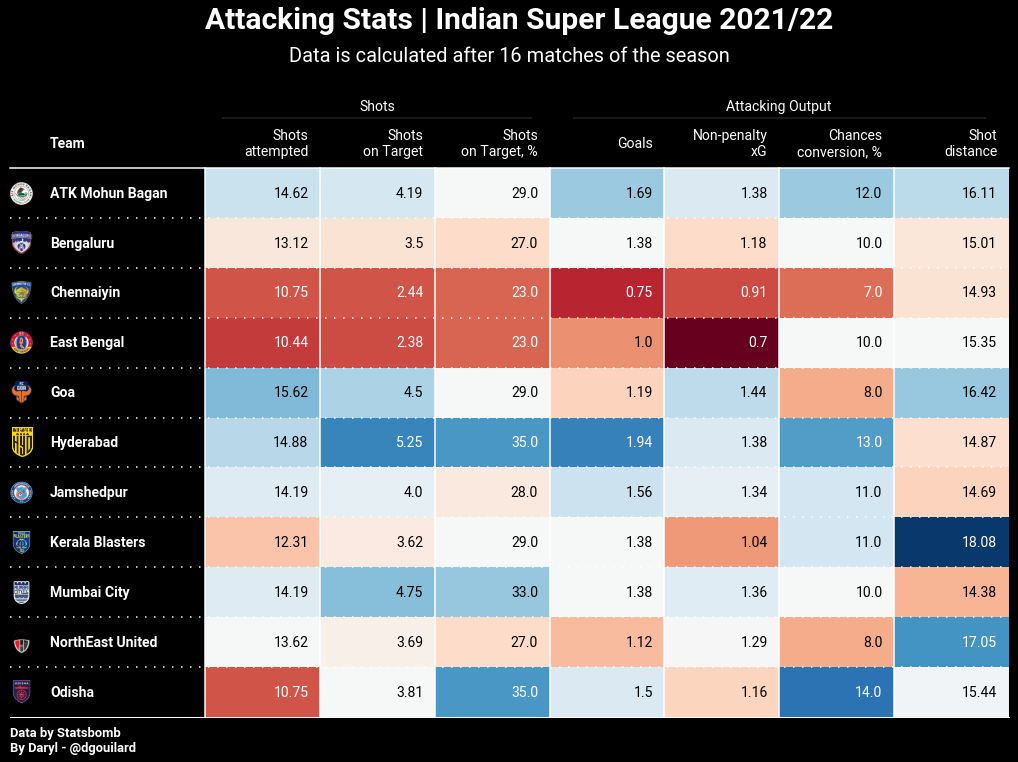

In [216]:
fig, ax = plt.subplots(figsize=(18, 12))

plt.style.use('dark_background')

table = Table(
    isl_attacking,
    column_definitions = attacking_colDefs,
    row_dividers = True,
    footer_divider = True,
    ax = ax,
    textprops = {"fontsize": 14},
    row_divider_kw = {"linewidth": 1.5, "linestyle": (0, (1, 5))},
    col_label_divider_kw = {"linewidth": 1.5, "linestyle": "-"},
    column_border_kw = {"linewidth": 1.5, "linestyle": "-"},
).autoset_fontcolors(colnames = ["Shots attempted", "Shots on Target", "Shots on Target, %", "Goals", "Non-penalty xG", "Chances conversion, %", "Shot distance"])

plt.suptitle(x = 0.52, y = 0.95, t = "Attacking Stats | Indian Super League 2021/22", size = 30, fontweight = 'bold', ha = 'center')
ax.set_title("Data is calculated after 16 matches of the season", fontdict = {"fontsize": 20})
ax.text(x = 0, y = 11.7, s = "Data by Statsbomb\nBy Daryl - @dgouilard", fontdict = {"fontsize": 13, "fontweight": 'bold'})

In [234]:
# Column definitions (isl_defending)
defending_colDefs = (
    [
        ColumnDefinition(
            name = 'Logos',
            title = "",
            textprops = {"ha": "center"},
            width = 0.2,
            plot_fn = image
        ),
        ColumnDefinition(
            name = 'Team',
            textprops = {"ha": "left", "weight": "bold"},
            width = 1.5
        )
    ] +
    [
        ColumnDefinition(
            name = defending_TacInt_cols[0],
            title = defending_TacInt_cols[0].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Tackles attempted'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Tackles + Interceptions",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_TacInt_cols[1],
            title = defending_TacInt_cols[1].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Tackles won'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Tackles + Interceptions",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_TacInt_cols[2],
            title = defending_TacInt_cols[2].replace(" ", "\n", 2),
            cmap = normed_cmap(isl_defending['PAdj Tackles won, %'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Tackles + Interceptions",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_TacInt_cols[3],
            title = defending_TacInt_cols[3].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Interceptions won'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Tackles + Interceptions",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_TacInt_cols[4],
            title = defending_TacInt_cols[4].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Clearances'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Tackles + Interceptions",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_pressing_cols[0],
            title = defending_pressing_cols[0].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Possession won'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Pressing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_pressing_cols[1],
            title = defending_pressing_cols[1].replace(" ", "\n", 2),
            cmap = normed_cmap(isl_defending['PAdj Possession won in opp. half'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Pressing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_pressing_cols[2],
            title = defending_pressing_cols[2].replace(" ", "\n"),
            cmap = normed_cmap(isl_defending['PAdj Pressures'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Pressing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_pressing_cols[3],
            title = "PPDA",
            cmap = normed_cmap(isl_defending["Opposition's passes per defensive action"], cmap = matplotlib.cm.RdBu_r, num_stds = 2.5),
            group = "Pressing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = defending_pressing_cols[4],
            title = defending_pressing_cols[4].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_defending['Fouls committed'], cmap = matplotlib.cm.RdBu_r, num_stds = 2.5),
            border = 'left'
        )
    ]
)

Text(0, 11.7, 'Data by Statsbomb\nBy Daryl - @dgouilard')

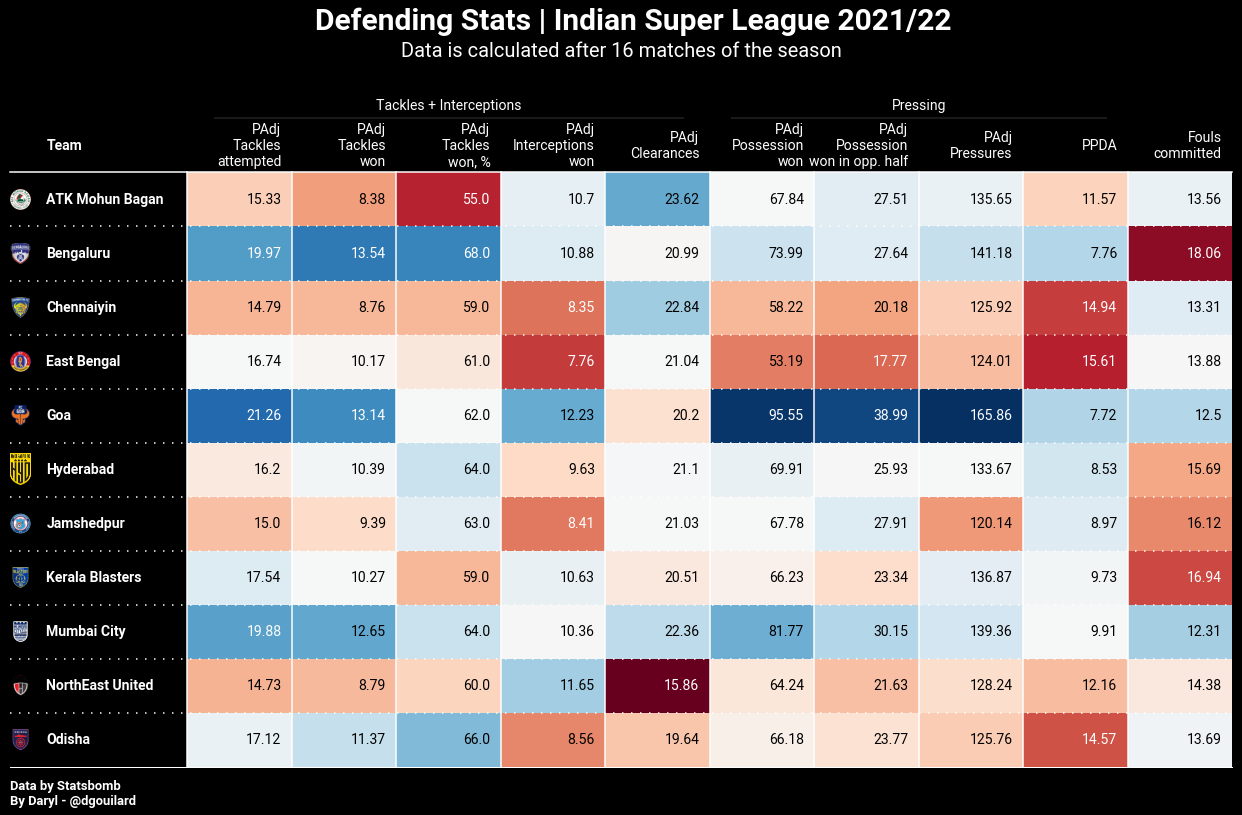

In [236]:
fig, ax = plt.subplots(figsize=(22, 13))

plt.style.use('dark_background')

table = Table(
    isl_defending,
    column_definitions = defending_colDefs,
    row_dividers = True,
    footer_divider = True,
    ax = ax,
    textprops = {"fontsize": 14},
    row_divider_kw = {"linewidth": 1.5, "linestyle": (0, (1, 5))},
    col_label_divider_kw = {"linewidth": 1.5, "linestyle": "-"},
    column_border_kw = {"linewidth": 1.5, "linestyle": "-"},
).autoset_fontcolors(colnames = ["PAdj Tackles attempted", "PAdj Tackles won", "PAdj Tackles won, %", "PAdj Interceptions won", 
                                "PAdj Clearances", "PAdj Possession won", "PAdj Possession won in opp. half", "PAdj Pressures", 
                                "Opposition's passes per defensive action", "Fouls committed"])

plt.suptitle(x = 0.52, y = 0.94, t = "Defending Stats | Indian Super League 2021/22", size = 30, fontweight = 'bold', ha = 'center')
ax.set_title("Data is calculated after 16 matches of the season", fontdict = {"fontsize": 20})
ax.text(x = 0, y = 11.7, s = "Data by Statsbomb\nBy Daryl - @dgouilard", fontdict = {"fontsize": 13, "fontweight": 'bold'})

In [244]:
# Column definitions (isl_possession)
possession_colDefs = (
    [
        ColumnDefinition(
            name = 'Logos',
            title = "",
            textprops = {"ha": "center"},
            width = 0.2,
            plot_fn = image
        ),
        ColumnDefinition(
            name = 'Team',
            textprops = {"ha": "left", "weight": "bold"},
            width = 1.5
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[0],
            title = possession_passing_cols[0].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Passes attempted'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[1],
            title = possession_passing_cols[1].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Passes completed'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[2],
            title = possession_passing_cols[2].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Passes completion, %'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[3],
            title = "Passes into\nopp. half",
            cmap = normed_cmap(isl_possession["Passes into opposition's half"], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[4],
            title = possession_passing_cols[4].replace(" ", "\n", 2),
            cmap = normed_cmap(isl_possession['Passes into final third'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[5],
            title = possession_passing_cols[5].replace(" ", "\n", 2),
            cmap = normed_cmap(isl_possession['Passes into penalty box'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_passing_cols[6],
            title = possession_passing_cols[6].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Key passes'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Passing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_crossing_cols[0],
            title = possession_crossing_cols[0].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Crosses attempted'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Crossing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_crossing_cols[1],
            title = possession_crossing_cols[1].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession["Crosses completed"], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Crossing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_crossing_cols[2],
            title = possession_crossing_cols[2].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Crosses completion, %'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Crossing",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_DriCar_cols[0],
            title = possession_DriCar_cols[0].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Dribbles attempted'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Dribbles + Carries",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_DriCar_cols[1],
            title = possession_DriCar_cols[1].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Dribbles completed'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Dribbles + Carries",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_DriCar_cols[2],
            title = possession_DriCar_cols[2].replace(" ", "\n"),
            cmap = normed_cmap(isl_possession['Carries'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Dribbles + Carries",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_DriCar_cols[3],
            title = possession_DriCar_cols[3].replace(" ", "\n", 2),
            cmap = normed_cmap(isl_possession['Carries into final third'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            group = "Dribbles + Carries",
            border = 'left'
        )
    ] +
    [
        ColumnDefinition(
            name = possession_DriCar_cols[4],
            title = possession_DriCar_cols[4].replace(" ", "\n", 1),
            cmap = normed_cmap(isl_possession['Fouls won'], cmap = matplotlib.cm.RdBu, num_stds = 2.5),
            border = 'left'
        )
    ]
)

Text(0, 11.7, 'Data by Statsbomb\nBy Daryl - @dgouilard')

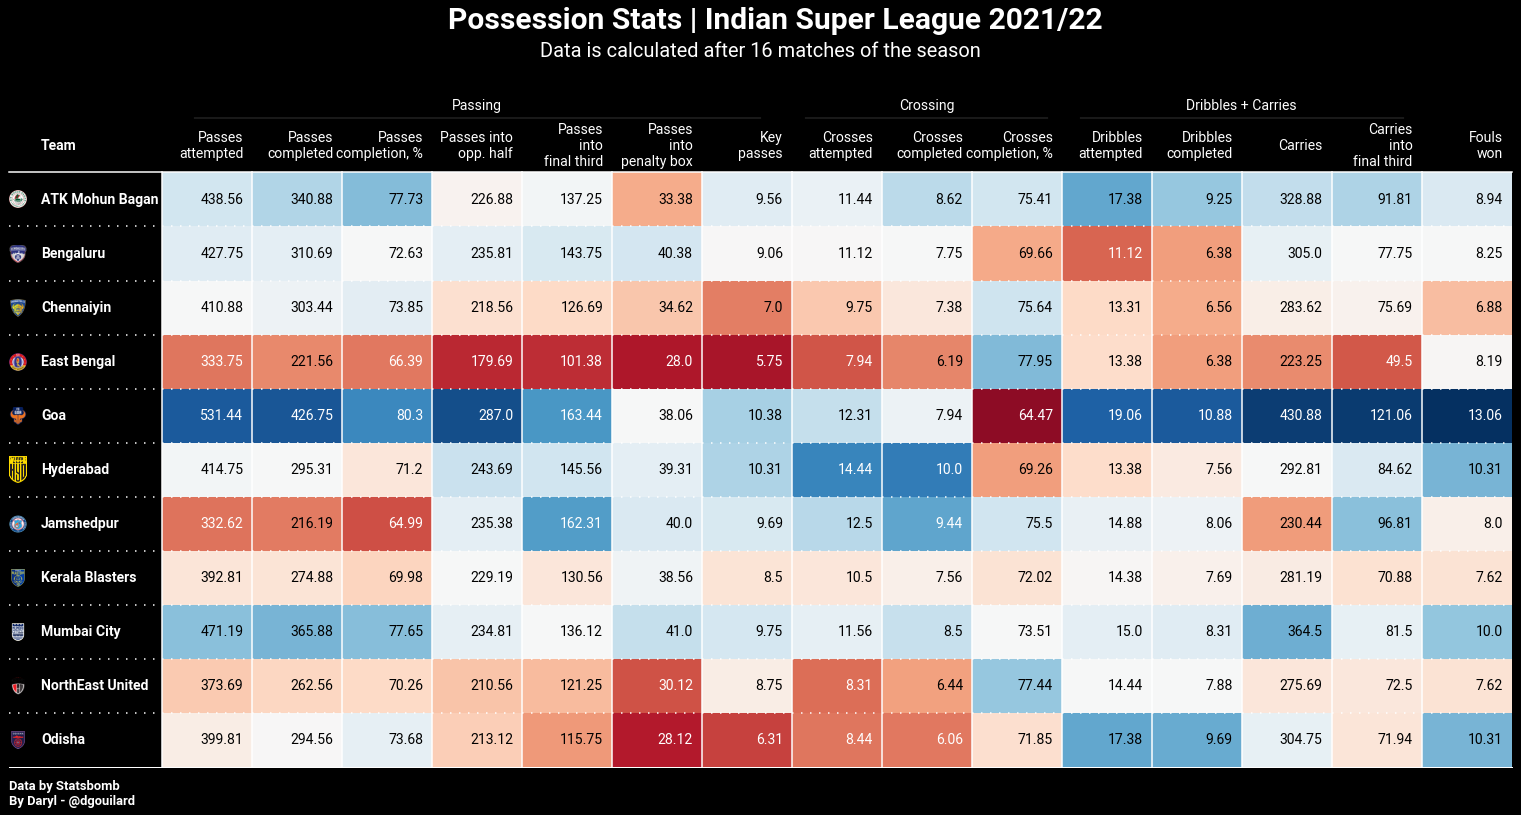

In [245]:
fig, ax = plt.subplots(figsize=(27, 13))

plt.style.use('dark_background')

table = Table(
    isl_possession,
    column_definitions = possession_colDefs,
    row_dividers = True,
    footer_divider = True,
    ax = ax,
    textprops = {"fontsize": 14},
    row_divider_kw = {"linewidth": 1.5, "linestyle": (0, (1, 5))},
    col_label_divider_kw = {"linewidth": 1.5, "linestyle": "-"},
    column_border_kw = {"linewidth": 1.5, "linestyle": "-"},
).autoset_fontcolors(colnames = ["Passes attempted", "Passes completed", "Passes completion, %", "Passes into opposition's half", 
                                "Passes into final third", "Passes into penalty box", "Key passes", "Crosses attempted", "Crosses completed", 
                                "Crosses completion, %", "Dribbles attempted", "Dribbles completed", "Carries", "Carries into final third", "Fouls won"])

plt.suptitle(x = 0.52, y = 0.94, t = "Possession Stats | Indian Super League 2021/22", size = 30, fontweight = 'bold', ha = 'center')
ax.set_title("Data is calculated after 16 matches of the season", fontdict = {"fontsize": 20})
ax.text(x = 0, y = 11.7, s = "Data by Statsbomb\nBy Daryl - @dgouilard", fontdict = {"fontsize": 13, "fontweight": 'bold'})

### Test cells

In [141]:
# Test calculate ball recovery time
# all_passes = isl_events.loc[(isl_events['match_id'] == chennaiyin_matchIds[0]) & (isl_events['type'] != 'Starting XI') & (isl_events['type'] != 'Tactical Shift') & (isl_events['type'] != 'Half Start') & (isl_events['type'] != 'Half End') & (isl_events['type'] != 'Substitution') & (isl_events['type'] != 'Player On') & (isl_events['type'] != 'Player Off') & (isl_events['type'] != 'Referee Ball-Drop') & (isl_events['type'] != 'Injury Stoppage')].reset_index().fillna(0)
# all_possession = all_passes.sort_values(by = ['period', 'minute', 'second']).drop('level_0', axis = 1).reset_index()
# all_possession.loc[(all_possession['possession'] == 5)]['possession_team']
# all_possession

# Idea: 
# +go through all 'possession' values, if len(df.loc[(df['possession'] == 0)]) -> ignore
# +if for loop meets ( ( (['type'] == 'Pass') & (['pass_outcome'] == 0) ) | ( (['type'] == 'Ball Receipt*') & (['ball_receipt_outcome'] == 'Incomplete') )
#                    | ( (['type'] == 'Dribble') & (['dribble_outcome'] == 'Incomplete') ) | (['type'] == 'Miscontrol') | (['type'] == 'Dispossessed') )
#                    and event [i + 1] belongs to the opposition
# then add the total duration of sequence to total count

In [142]:
# min_possession = all_possession['possession'][0]
# max_possession = all_possession['possession'][(len(all_possession) - 1)]
# team_name = 'Chennaiyin'

# for possession_value in range(min_possession, max_possession):
    
#     total_ballRecoveryTime = 0
#     possession_sequence = []
#     possession_sequence = all_possession.loc[(all_possession['possession'] == possession_value)]

#     if (len(possession_sequence) != 0):

#         previousTeam_inPossession = ''
#         team_inPossession = ''

#         for i in range(len(possession_sequence) - 1):

#             if (i > 0):
#                 previousTeam_inPossession = team_inPossession
            
#             team_inPossession = possession_sequence['possession_team_id'][i]
            
#             if ( ( (possession_sequence['type'][i] == 'Pass') & (possession_sequence['pass_outcome'][i] == 0) ) | \
#                 ( (possession_sequence['type'][i] == 'Ball Receipt*') & (possession_sequence['ball_receipt_outcome'] == 'Incomplete') ) | \
#                     ( (possession_sequence['type'][i] == 'Dribble') & (possession_sequence['dribble_outcome'] == 'Incomplete')) | \
#                         (possession_sequence['type'][i] == 'Dispossessed') | (possession_sequence['type'][i] == 'Miscontrol') ) & \
#                             (team_inPossession != previousTeam_inPossession):